# Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

## Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

## Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr

data = pd.read_csv('water.csv')

In [3]:
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


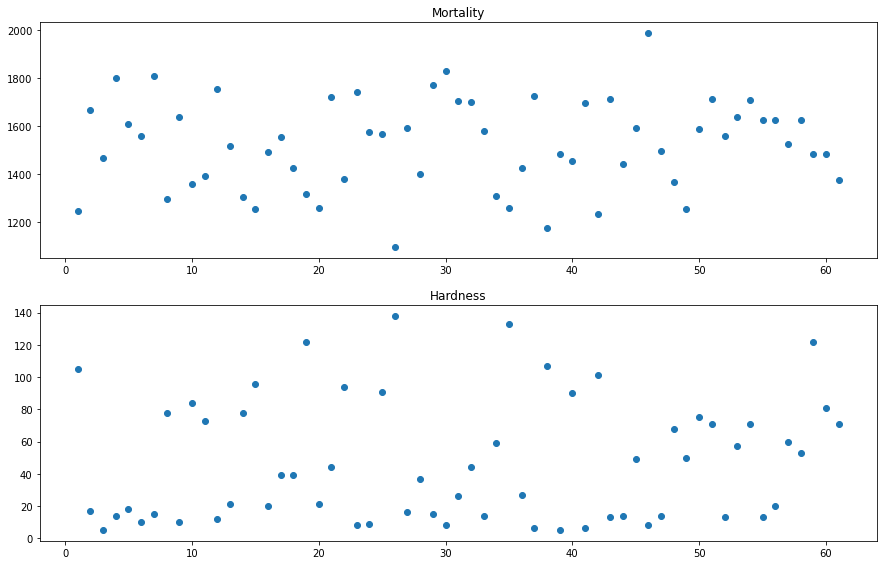

In [4]:
fig = plt.figure(figsize=(15,4))

dot_graph_1 = fig.add_subplot(211)
plt.title('Mortality')

dot_graph_2 = fig.add_subplot(212)
plt.title('Hardness')

dot_graph_1 = dot_graph_1.scatter(data['Unnamed: 0'], data['mortality'])  #generate line graph
dot_graph_2 = dot_graph_2.scatter(data['Unnamed: 0'], data['hardness'])
plt.subplots_adjust(hspace = 0.2, wspace=1, top=2, bottom=0.2)

plt.show()

In [5]:
pearsonr(data['mortality'],data['hardness'])

(-0.6548486232042465, 1.033133926034952e-08)

In [6]:
from scipy.stats import spearmanr

spearmanr(data['mortality'],data['hardness'])

SpearmanrResult(correlation=-0.6316646189166502, pvalue=4.79546153722838e-08)

In [7]:
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [15]:
train_test_split?

In [29]:
from sklearn.model_selection import train_test_split

X = data[['mortality']]
y = data['hardness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
model.coef_

array([-0.13055019])

In [32]:
model.intercept_

245.26119532596613

In [33]:
y_pred = model.predict(X_test)
y_pred

array([82.46510589, 41.86399617, 50.08865827, 23.06476852, 74.63209437,
       33.11713331, 80.89850358, 38.0780406 , 46.95545366, 23.84806967,
       74.37099398, 51.39416019, 42.25564675, 10.2708497 , 22.15091718,
       58.83552113])

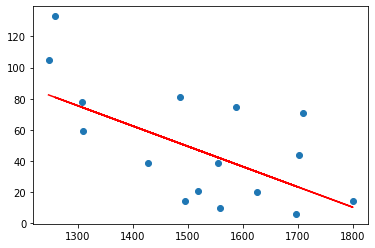

In [34]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [35]:
import statsmodels.api as sm
X_const = sm.add_constant(X_train)
X_const.shape

model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     32.82
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           9.05e-07
Time:                        14:18:50   Log-Likelihood:                -215.09
No. Observations:                  45   AIC:                             434.2
Df Residuals:                      43   BIC:                             437.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        245.2612     35.062      6.995      0.0

In [36]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const        245.261195
mortality     -0.130550
dtype: float64
R2:  0.432874147740124


In [38]:
wls_prediction_std?

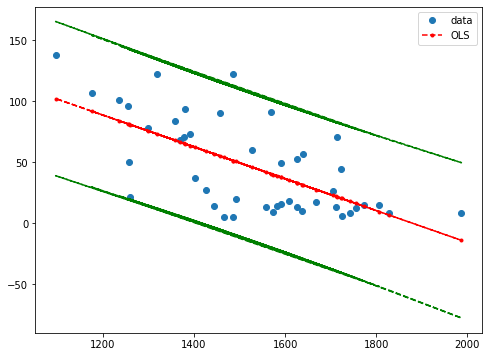

In [37]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

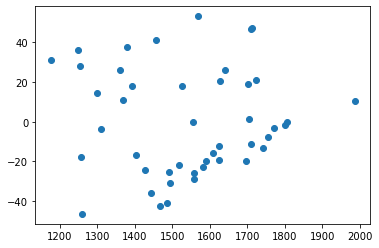

In [27]:
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.show()

(array([ 3.,  3., 10.,  5.,  6.,  2.,  6.,  4.,  3.,  3.]),
 array([-46.51149498, -36.53875141, -26.56600784, -16.59326427,
         -6.6205207 ,   3.35222287,  13.32496644,  23.29771001,
         33.27045358,  43.24319715,  53.21594072]),
 <BarContainer object of 10 artists>)

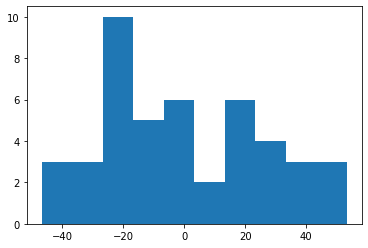

In [28]:
plt.hist(results.resid)

 Есть ли связь между жёсткостью воды и средней годовой смертностью?
 
 Есть не сильная отрицательная корреляция между жесткостью воды и смертностью.
 
 

## Задание 2

In [47]:
#разбили на 2 датасета
south_towns = data[data['location'] == 'South']

north_towns = data[data['location'] == 'North']

south_towns.head(10)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


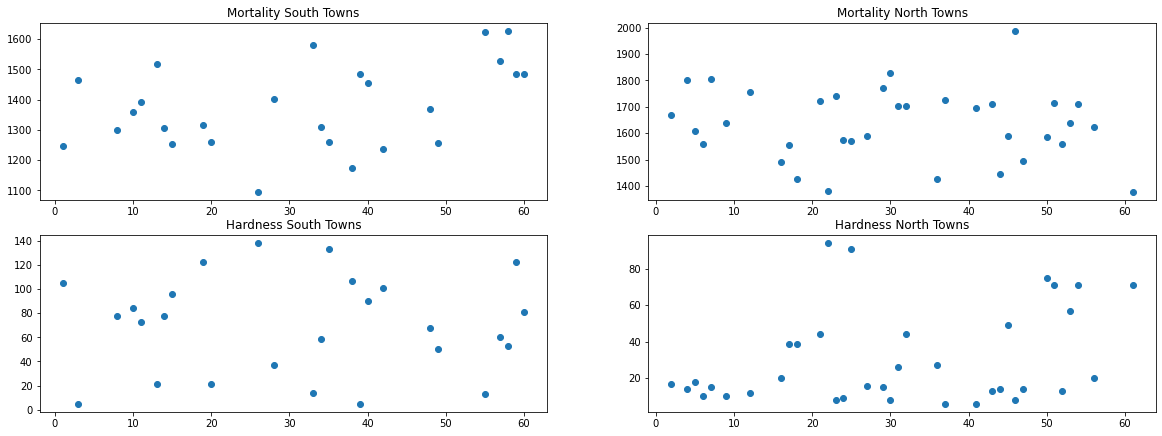

In [62]:
fig = plt.figure(figsize=(20,3))

dot_graph_1 = fig.add_subplot(221)
plt.title('Mortality South Towns')

dot_graph_2 = fig.add_subplot(222)
plt.title('Mortality North Towns')

dot_graph_3 = fig.add_subplot(223)
plt.title('Hardness South Towns')

dot_graph_4 = fig.add_subplot(224)
plt.title('Hardness North Towns')

dot_graph_1 = dot_graph_1.scatter(south_towns['Unnamed: 0'], south_towns['mortality'])
dot_graph_2 = dot_graph_2.scatter(north_towns['Unnamed: 0'], north_towns['mortality'])
dot_graph_3 = dot_graph_3.scatter(south_towns['Unnamed: 0'], south_towns['hardness'])
dot_graph_4 = dot_graph_4.scatter(north_towns['Unnamed: 0'], north_towns['hardness'])
plt.subplots_adjust(hspace = 0.2, wspace=0.2, top=2, bottom=0.2)

plt.show()

In [63]:
pearsonr(south_towns['mortality'],south_towns['hardness'])

(-0.6021532715484158, 0.0011346743048161923)

In [64]:
pearsonr(north_towns['mortality'],north_towns['hardness'])

(-0.36859783832887183, 0.029344659047110602)

In [65]:
spearmanr(south_towns['mortality'],south_towns['hardness'])

SpearmanrResult(correlation=-0.5957229185013566, pvalue=0.0013223867410179474)

In [66]:
spearmanr(north_towns['mortality'],north_towns['hardness'])

SpearmanrResult(correlation=-0.4042078956511175, pvalue=0.01602900609606112)

In [68]:
X_south = south_towns[['mortality']]
y_south = south_towns['hardness']

X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X_south, y_south, test_size=0.25, random_state=42)

X_north = north_towns[['mortality']]
y_north = north_towns['hardness']

X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_north, y_north, test_size=0.25, random_state=42)



In [77]:
model_south = LinearRegression()
model_south.fit(X_south_train, y_south_train)



LinearRegression()

In [78]:
model_north = LinearRegression()
model_north.fit(X_north_train, y_north_train)

LinearRegression()

In [83]:
print(model_south.coef_)
print(model_south.intercept_)
print(model_north.coef_)
print(model_north.intercept_)

[-0.19144129]
335.5684282411057
[-0.09308216]
183.5328689819372


In [86]:
y_south_pred = model_south.predict(X_south_test)
y_north_pred = model_north.predict(X_north_test)

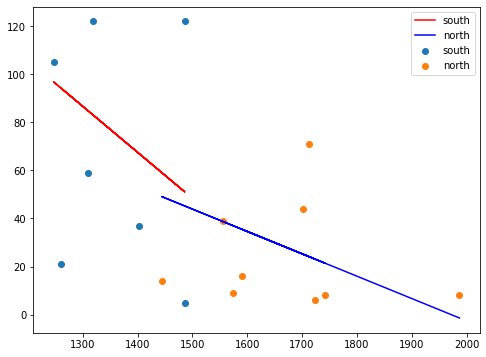

In [96]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(X_south_test, y_south_test, label = 'south')
ax.scatter(X_north_test, y_north_test, label = 'north')
ax.plot(X_south_test, y_south_pred, c='r', label = 'south')
ax.plot(X_north_test, y_north_pred, c='b', label = 'north')
ax.legend(loc='best');

In [97]:
X_south_const = sm.add_constant(X_south_train)
X_south_const.shape

model_south = sm.OLS(y_south_train, X_south_const)
results_south = model_south.fit()
print(results_south.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     25.24
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           0.000104
Time:                        15:04:22   Log-Likelihood:                -87.006
No. Observations:                  19   AIC:                             178.0
Df Residuals:                      17   BIC:                             179.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        335.5684     53.030      6.328      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [100]:
X_north_const = sm.add_constant(X_north_train)
X_north_const.shape

model_north = sm.OLS(y_north_train, X_north_const)
results_north = model_north.fit()
print(results_north.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     5.993
Date:                Mon, 30 Aug 2021   Prob (F-statistic):             0.0221
Time:                        15:27:41   Log-Likelihood:                -119.48
No. Observations:                  26   AIC:                             243.0
Df Residuals:                      24   BIC:                             245.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        183.5329     61.827      2.969      0.0

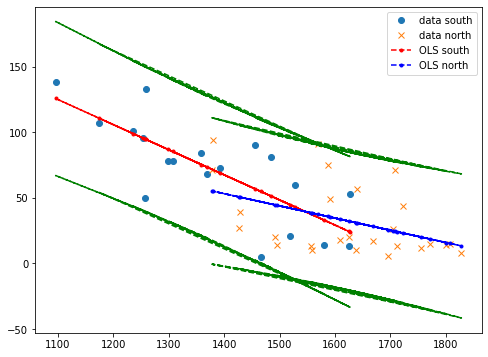

In [113]:
prstd_s, iv_l_s, iv_u_s = wls_prediction_std(results_south) 
prstd_n, iv_l_n, iv_u_n = wls_prediction_std(results_north) 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_south_const.iloc[:, 1], y_south_train, 'o', label="data south")
ax.plot(X_north_const.iloc[:, 1], y_north_train, 'x', label="data north")
ax.plot(X_south_const.iloc[:, 1], results_south.fittedvalues, 'r--.', label="OLS south")
ax.plot(X_north_const.iloc[:, 1], results_north.fittedvalues, 'b--.', label="OLS north")
ax.plot(X_south_const.iloc[:, 1], iv_u_s, 'g--')
ax.plot(X_north_const.iloc[:, 1], iv_u_n, 'g--')
ax.plot(X_south_const.iloc[:, 1], iv_l_s, 'g--')
ax.plot(X_north_const.iloc[:, 1], iv_l_n, 'g--')
ax.legend(loc='best');

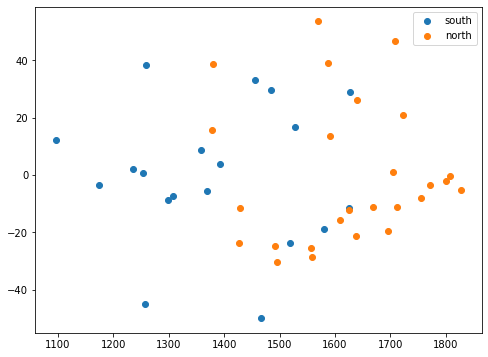

In [119]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X_south_const.iloc[:, 1], results_south.resid, label='south')
ax.scatter(X_north_const.iloc[:, 1], results_north.resid, label='north')
ax.legend(loc='best');
plt.show()

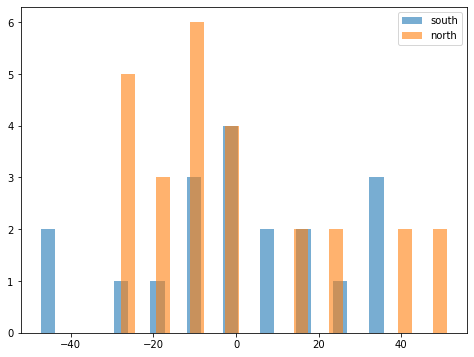

In [139]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(results_south.resid,rwidth = 0.4, alpha = 0.6,  label='south')
ax.hist(results_north.resid,rwidth = 0.4,  alpha = 0.6,  label='north')
ax.legend(loc='best')
plt.show()

Корреляция между жесткостью воды и смертностью сохраняется и отдельно для северных и южных городов.
Для северных городов в большей степени чем для южных.